In [1]:
import pandas as pd
from tqdm import tqdm
df = pd.read_csv("X_train_update.csv", index_col = 0)
df.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [2]:
new_names =  {'designation' : 'product'}
df = df.rename(new_names, axis = 1)

In [3]:
df = df.fillna("")
df = df.apply(lambda x: x.astype(str).str.lower())

In [4]:
import re

In [5]:
df.head()

,product,description,productid,imageid
0,olivia: personalisiertes notizbuch / 150 seite...,,3804725264,1263597046
1,journal des arts (le) n° 133 du 28/09/2001 - l...,,436067568,1008141237
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen de marque speedlink est ...,201115110,938777978
3,peluche donald - europe - disneyland 2000 (mar...,,50418756,457047496
4,la guerre des tuques,luc a des id&eacute;es de grandeur. il veut or...,278535884,1077757786


## Tokenize words

In [6]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.regexp import RegexpTokenizer
import re
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')
tokenizer = nltk.data.load('nltk:tokenizers/punkt/french.pickle')

In [7]:
stop_words = set(stopwords.words("french"))
print(stop_words)

{'étants', 'fusses', 'fussent', 'eûtes', 'la', 'une', 'eussiez', 'été', 'sa', 'auraient', 'ses', 'fûtes', 'ayantes', 'eue', 'seront', 'ayante', 'dans', 'étions', 'ait', 'est', 'aurons', 't', 'serions', 'au', 'aux', 'moi', 'eurent', 'étés', 'serons', 'leur', 'ayant', 'était', 'eût', 'de', 'par', 'étiez', 'sur', 'eues', 'aie', 'ayants', 'serais', 'tu', 'êtes', 'je', 'nous', 'eut', 'aurai', 'fussions', 'tes', 'soyez', 'ton', 'aurez', 'fut', 'soyons', 'avaient', 'même', 'étant', 'étais', 'eux', 'étaient', 'du', 'auriez', 'serait', 'aies', 'il', 'ils', 'vos', 'd', 'sera', 'sois', 'n', 'toi', 'que', 'étées', 'eu', 'ayons', 'seriez', 'eus', 'aurais', 'soit', 'en', 'ta', 'lui', 'notre', 'auras', 'des', 'ayez', 'as', 'mes', 'à', 'on', 'eussent', 'avons', 'votre', 'aient', 'eûmes', 'ne', 'seraient', 'aura', 'me', 'serai', 'serez', 'ce', 'mon', 'te', 'm', 'ou', 'avais', 'sont', 'se', 'qui', 'nos', 'eussions', 'étée', 'avec', 'qu', 'sommes', 'ces', 'c', 'étantes', 'seras', 'eusse', 'pas', 'pour', 

In [8]:
stop_words.update(list(set(stopwords.words("english"))))

In [9]:
stop_words.update(["s'", "l'", "c'"])

In [10]:
import string
punct = []
len(string.punctuation)
for i in range(32):
    it = string.punctuation[i]
    punct.append(it)
    
print(punct)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [11]:
stop_words.update(punct)

In [12]:
html_tags = ["br", "h1", "h2", "h3", "p", "strong", "li", "tr", "td", "img", "link", "ul", "ol"]

In [13]:
stop_words.update(html_tags)

In [14]:
def stop_words_filtering(txt_list):
    no_stop_list = []
    for it in txt_list:
        if it not in stop_words:
            no_stop_list.append(it)
    return no_stop_list

In [15]:
def word_edit(text):
    tokenizer = RegexpTokenizer("[a-zA-Zé]{3,}")
    wrd = tokenizer.tokenize(text)
    wrd = stop_words_filtering(wrd)
#    wrd = word_tokenize(text)
    return ",".join(wrd)

In [16]:
df["text"]= df["product"].apply(word_edit) + "," + df["description"].apply(word_edit)

In [17]:
df.head()

,product,description,productid,imageid,text
0,olivia: personalisiertes notizbuch / 150 seite...,,3804725264,1263597046,"olivia,personalisiertes,notizbuch,seiten,punkt..."
1,journal des arts (le) n° 133 du 28/09/2001 - l...,,436067568,1008141237,"journal,arts,art,marche,salon,art,asiatique,pa..."
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen de marque speedlink est ...,201115110,938777978,"grand,stylet,ergonomique,bleu,gamepad,nintendo..."
3,peluche donald - europe - disneyland 2000 (mar...,,50418756,457047496,"peluche,donald,europe,disneyland,marionnette,d..."
4,la guerre des tuques,luc a des id&eacute;es de grandeur. il veut or...,278535884,1077757786,"guerre,tuques,luc,eacute,grandeur,veut,organis..."


In [18]:
sentences = []
for it in df["text"]:
    sentences.append(it.split(","))


In [19]:
def clean_sentence(sen):
    
    main_list = []
    for it in sen:
        sub_list = []
        for word in it:
            if ((word != "") & (word not in stop_words)):
                sub_list.append(word)
        main_list.append(sub_list)
    return main_list

In [20]:
new_sent = clean_sentence(sentences)

In [21]:
def sen_edit(text):
    tokenizer = RegexpTokenizer("[a-zA-Zé]{3,}")
    wrd = tokenizer.tokenize(text)
    wrd = stop_words_filtering(wrd)
#    wrd = word_tokenize(text)
    wrd = ",".join(wrd)
    return wrd.split(",")

In [22]:
def ret_string(text):
    tokenizer = RegexpTokenizer("[a-zA-Zé]{3,}")
    wrd = tokenizer.tokenize(text)
    wrd = stop_words_filtering(wrd)
#    wrd = word_tokenize(text)
    wrd = ",".join(wrd)
    return wrd

In [23]:
df["clean_text"] = df["text"].apply(sen_edit)

In [24]:
df.head()

,product,description,productid,imageid,text,clean_text
0,olivia: personalisiertes notizbuch / 150 seite...,,3804725264,1263597046,"olivia,personalisiertes,notizbuch,seiten,punkt...","[olivia, personalisiertes, notizbuch, seiten, ..."
1,journal des arts (le) n° 133 du 28/09/2001 - l...,,436067568,1008141237,"journal,arts,art,marche,salon,art,asiatique,pa...","[journal, arts, art, marche, salon, art, asiat..."
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen de marque speedlink est ...,201115110,938777978,"grand,stylet,ergonomique,bleu,gamepad,nintendo...","[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,peluche donald - europe - disneyland 2000 (mar...,,50418756,457047496,"peluche,donald,europe,disneyland,marionnette,d...","[peluche, donald, europe, disneyland, marionne..."
4,la guerre des tuques,luc a des id&eacute;es de grandeur. il veut or...,278535884,1077757786,"guerre,tuques,luc,eacute,grandeur,veut,organis...","[guerre, tuques, luc, eacute, grandeur, veut, ..."


In [25]:
corpus = []
for it in df["clean_text"]:
    corpus.append(it)

In [26]:
text = ""
for it in df["text"]:
    els = it.split(",")
    for el in els:
        text += el+ ","

In [27]:
all_words = text.split(",")
len(all_words)

4665452

In [28]:
import numpy as np

In [29]:
len(np.unique(all_words))

130098

Import y_train

In [30]:
df2 = pd.read_csv("Y_train_CVw08PX.csv", index_col = 0)
target = df2["prdtypecode"]
target.head()

0      10
1    2280
2      50
3    1280
4    2705
Name: prdtypecode, dtype: int64

In [31]:
df_xy = pd.concat([df2["prdtypecode"],df["text"], df["clean_text"]], axis=1)
df_xy.head()

,prdtypecode,text,clean_text
0,10,"olivia,personalisiertes,notizbuch,seiten,punkt...","[olivia, personalisiertes, notizbuch, seiten, ..."
1,2280,"journal,arts,art,marche,salon,art,asiatique,pa...","[journal, arts, art, marche, salon, art, asiat..."
2,50,"grand,stylet,ergonomique,bleu,gamepad,nintendo...","[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,1280,"peluche,donald,europe,disneyland,marionnette,d...","[peluche, donald, europe, disneyland, marionne..."
4,2705,"guerre,tuques,luc,eacute,grandeur,veut,organis...","[guerre, tuques, luc, eacute, grandeur, veut, ..."


In [32]:
codes = sorted(list(set(df_xy["prdtypecode"].values)))
new_codes = [*range(27)]
df_xy["codes"] = df_xy["prdtypecode"].replace(to_replace = codes, value = new_codes)

In [33]:
df_xy.head()

,prdtypecode,text,clean_text,codes
0,10,"olivia,personalisiertes,notizbuch,seiten,punkt...","[olivia, personalisiertes, notizbuch, seiten, ...",0
1,2280,"journal,arts,art,marche,salon,art,asiatique,pa...","[journal, arts, art, marche, salon, art, asiat...",18
2,50,"grand,stylet,ergonomique,bleu,gamepad,nintendo...","[grand, stylet, ergonomique, bleu, gamepad, ni...",2
3,1280,"peluche,donald,europe,disneyland,marionnette,d...","[peluche, donald, europe, disneyland, marionne...",7
4,2705,"guerre,tuques,luc,eacute,grandeur,veut,organis...","[guerre, tuques, luc, eacute, grandeur, veut, ...",25


In [34]:
df_xy = df_xy[["prdtypecode", "text", "codes", "clean_text"]]
df_xy.head()

,prdtypecode,text,codes,clean_text
0,10,"olivia,personalisiertes,notizbuch,seiten,punkt...",0,"[olivia, personalisiertes, notizbuch, seiten, ..."
1,2280,"journal,arts,art,marche,salon,art,asiatique,pa...",18,"[journal, arts, art, marche, salon, art, asiat..."
2,50,"grand,stylet,ergonomique,bleu,gamepad,nintendo...",2,"[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,1280,"peluche,donald,europe,disneyland,marionnette,d...",7,"[peluche, donald, europe, disneyland, marionne..."
4,2705,"guerre,tuques,luc,eacute,grandeur,veut,organis...",25,"[guerre, tuques, luc, eacute, grandeur, veut, ..."


In [35]:
def token_wrds(text):
    tokenizer = RegexpTokenizer("[a-zA-Zé]{3,}")
    wrd = tokenizer.tokenize(text)
    wrd = stop_words_filtering(wrd)
#    wrd = word_tokenize(text)
    return wrd

In [36]:
from collections import Counter

el_text = ""
var = df_xy[df_xy["prdtypecode"]== 1301]["text"].values
for el in var:
    el_text += el
el_words = token_wrds(el_text)


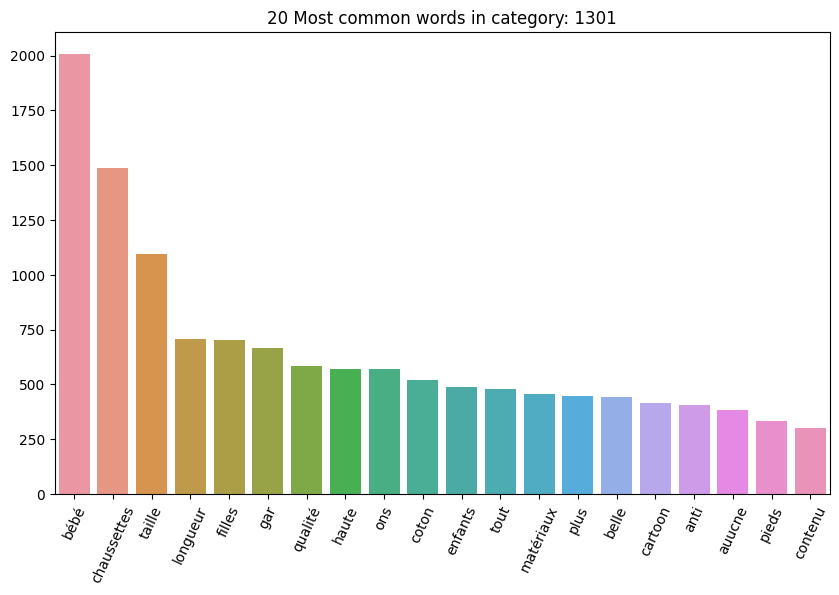

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
#chaine = "".join(i.lower() for i in tokens)
dico = Counter(el_words)
mots = [m[0] for m in dico.most_common(20)]
freq = [m[1] for m in dico.most_common(20)]

plt.figure(figsize = (10,6))
sns.barplot(x=mots, y=freq)
plt.title("20 Most common words in category: 1301")
plt.xticks(rotation = 65);

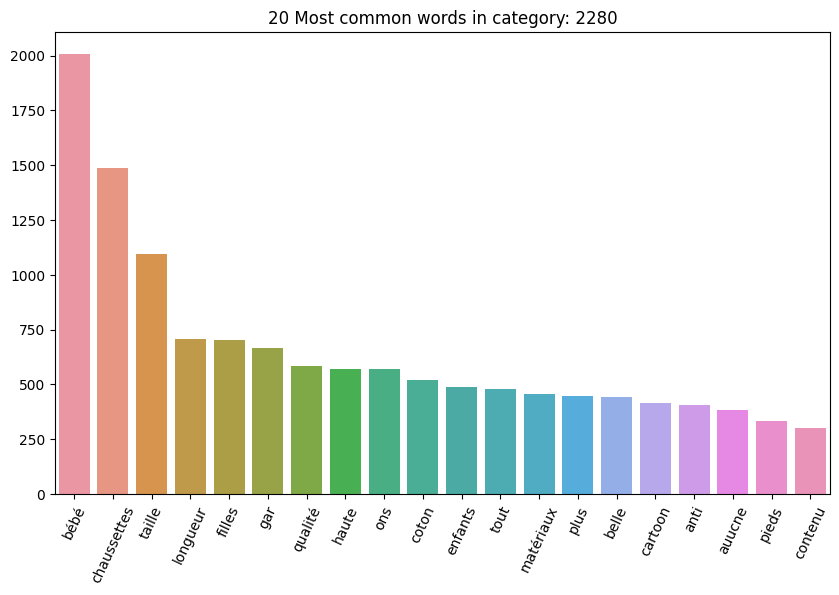

In [38]:
dico = Counter(el_words)
mots = [m[0] for m in dico.most_common(20)]
freq = [m[1] for m in dico.most_common(20)]

plt.figure(figsize = (10,6))
sns.barplot(x=mots, y=freq)
plt.title("20 Most common words in category: 2280")
plt.xticks(rotation = 65);

In [39]:
df_xy.head()

,prdtypecode,text,codes,clean_text
0,10,"olivia,personalisiertes,notizbuch,seiten,punkt...",0,"[olivia, personalisiertes, notizbuch, seiten, ..."
1,2280,"journal,arts,art,marche,salon,art,asiatique,pa...",18,"[journal, arts, art, marche, salon, art, asiat..."
2,50,"grand,stylet,ergonomique,bleu,gamepad,nintendo...",2,"[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,1280,"peluche,donald,europe,disneyland,marionnette,d...",7,"[peluche, donald, europe, disneyland, marionne..."
4,2705,"guerre,tuques,luc,eacute,grandeur,veut,organis...",25,"[guerre, tuques, luc, eacute, grandeur, veut, ..."


In [40]:
print(df_xy.shape)
df_xy = df_xy.drop(index=[37124, 52327, 79708, 80859])
print(df_xy.shape)

(84916, 4)
(84912, 4)


In [41]:
from gensim.models import Word2Vec

w2v = Word2Vec(df_xy["clean_text"], vector_size=100, min_count=1, window=5, epochs=100)

In [42]:
w2v.save("w2v_X_train_model")

In [43]:
word_dict = w2v.wv.key_to_index

In [44]:
word_dict

{'tre': 0,
 'couleur': 1,
 'taille': 2,
 'piscine': 3,
 'plus': 4,
 'peut': 5,
 'eau': 6,
 'haute': 7,
 'qualité': 8,
 'dimensions': 9,
 'facile': 10,
 'matériel': 11,
 'tout': 12,
 'enfants': 13,
 'produit': 14,
 'sans': 15,
 'caractéristiques': 16,
 'jeu': 17,
 'bois': 18,
 'lumi': 19,
 'acier': 20,
 'eacute': 21,
 'oreiller': 22,
 'non': 23,
 'type': 24,
 'pla': 25,
 'comme': 26,
 'coussin': 27,
 'comprend': 28,
 'poids': 29,
 'cette': 30,
 'style': 31,
 'che': 32,
 'batterie': 33,
 'led': 34,
 'décoration': 35,
 'taie': 36,
 'hauteur': 37,
 'blanc': 38,
 'inclus': 39,
 'bébé': 40,
 'ans': 41,
 'main': 42,
 'mode': 43,
 'protection': 44,
 'sac': 45,
 'amp': 46,
 'temps': 47,
 'mod': 48,
 'description': 49,
 'raison': 50,
 'div': 51,
 'utiliser': 52,
 'paquet': 53,
 'design': 54,
 'pompe': 55,
 'mesure': 56,
 'pcs': 57,
 'kit': 58,
 'marque': 59,
 'neuf': 60,
 'contenu': 61,
 'anti': 62,
 'sol': 63,
 'maison': 64,
 'longueur': 65,
 'filtration': 66,
 'emballage': 67,
 'plastique': 68

In [45]:
w2v.wv.index_to_key

['tre',
 'couleur',
 'taille',
 'piscine',
 'plus',
 'peut',
 'eau',
 'haute',
 'qualité',
 'dimensions',
 'facile',
 'matériel',
 'tout',
 'enfants',
 'produit',
 'sans',
 'caractéristiques',
 'jeu',
 'bois',
 'lumi',
 'acier',
 'eacute',
 'oreiller',
 'non',
 'type',
 'pla',
 'comme',
 'coussin',
 'comprend',
 'poids',
 'cette',
 'style',
 'che',
 'batterie',
 'led',
 'décoration',
 'taie',
 'hauteur',
 'blanc',
 'inclus',
 'bébé',
 'ans',
 'main',
 'mode',
 'protection',
 'sac',
 'amp',
 'temps',
 'mod',
 'description',
 'raison',
 'div',
 'utiliser',
 'paquet',
 'design',
 'pompe',
 'mesure',
 'pcs',
 'kit',
 'marque',
 'neuf',
 'contenu',
 'anti',
 'sol',
 'maison',
 'longueur',
 'filtration',
 'emballage',
 'plastique',
 'forfait',
 'forme',
 'air',
 'lég',
 'environ',
 'couverture',
 'durable',
 'bleu',
 'avant',
 'drone',
 'cadeau',
 'syst',
 'couleurs',
 'contr',
 'tous',
 'voiture',
 'utilisation',
 'pouvez',
 'polyester',
 'pvc',
 'hors',
 'tissu',
 'noir',
 'espace',
 'coto

In [46]:
word_vector = w2v.wv

In [47]:
len(word_vector)

130093

In [48]:
import numpy as np
wrds = set(w2v.wv.index_to_key )
X_vect = np.array([np.array([w2v.wv[i] for i in ls if i in wrds])
                         for ls in df_xy["clean_text"]])
#X_test_vect = np.array([np.array([w2v.wv[i] for i in ls if i in wrds])
 #                        for ls in X_test])

C:\Users\Admin\AppData\Local\Temp\ipykernel_48188\1203519703.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_vect = np.array([np.array([w2v.wv[i] for i in ls if i in wrds])


In [49]:
for i, v in enumerate(X_vect):
    print(len(df_xy["clean_text"].iloc[i]), len(v))

#for i, v in enumerate(X_train_vect):
 #   print(len(X_train.iloc[i]), len(v))

8 8
20 20
84 84
6 6
22 22
6 6
5 5
17 17
5 5
190 190
72 72
357 357
115 115
54 54
177 177
25 25
5 5
5 5
7 7
19 19
4 4
10 10
7 7
10 10
342 342
4 4
87 87
29 29
7 7
7 7
91 91
2 2
56 56
89 89
3 3
54 54
268 268
77 77
145 145
35 35
32 32
3 3
32 32
142 142
7 7
42 42
6 6
6 6
4 4
108 108
3 3
5 5
3 3
44 44
5 5
158 158
72 72
4 4
4 4
109 109
85 85
7 7
320 320
13 13
14 14
21 21
3 3
106 106
93 93
3 3
92 92
6 6
13 13
33 33
11 11
2 2
145 145
9 9
129 129
95 95
298 298
93 93
43 43
90 90
54 54
47 47
6 6
40 40
13 13
14 14
12 12
71 71
12 12
8 8
7 7
136 136
23 23
40 40
6 6
91 91
16 16
29 29
8 8
62 62
7 7
21 21
8 8
33 33
113 113
5 5
11 11
9 9
2 2
7 7
82 82
6 6
54 54
6 6
171 171
44 44
122 122
101 101
4 4
105 105
3 3
101 101
13 13
4 4
5 5
17 17
5 5
6 6
66 66
56 56
9 9
148 148
3 3
6 6
17 17
16 16
139 139
7 7
5 5
4 4
4 4
15 15
113 113
94 94
137 137
28 28
4 4
35 35
35 35
24 24
5 5
8 8
6 6
84 84
340 340
18 18
13 13
6 6
20 20
6 6
44 44
9 9
1 1
185 185
6 6
20 20
65 65
46 46
62 62
3 3
13 13
67 67
218 218
108 108
18 18


75 75
5 5
92 92
2 2
5 5
7 7
187 187
5 5
20 20
8 8
63 63
8 8
89 89
119 119
5 5
3 3
109 109
4 4
193 193
4 4
59 59
54 54
148 148
29 29
22 22
7 7
112 112
5 5
102 102
93 93
76 76
10 10
65 65
26 26
38 38
8 8
16 16
4 4
4 4
105 105
10 10
158 158
9 9
381 381
100 100
12 12
7 7
110 110
23 23
62 62
118 118
20 20
39 39
60 60
3 3
57 57
8 8
13 13
106 106
11 11
52 52
8 8
88 88
4 4
39 39
7 7
95 95
6 6
121 121
21 21
40 40
66 66
12 12
89 89
310 310
42 42
60 60
200 200
98 98
2 2
2 2
6 6
19 19
38 38
199 199
13 13
43 43
248 248
238 238
19 19
19 19
41 41
10 10
94 94
91 91
25 25
280 280
24 24
7 7
32 32
7 7
6 6
50 50
251 251
7 7
4 4
16 16
73 73
107 107
27 27
361 361
24 24
3 3
3 3
12 12
34 34
60 60
22 22
42 42
46 46
248 248
86 86
95 95
79 79
2 2
6 6
443 443
98 98
11 11
32 32
16 16
7 7
20 20
161 161
643 643
5 5
5 5
4 4
6 6
8 8
6 6
11 11
5 5
6 6
75 75
56 56
14 14
74 74
108 108
5 5
24 24
33 33
44 44
47 47
3 3
86 86
102 102
57 57
6 6
117 117
91 91
55 55
62 62
73 73
7 7
156 156
4 4
3 3
8 8
61 61
60 60
12 12
306 306


7 7
55 55
70 70
34 34
27 27
6 6
11 11
7 7
5 5
17 17
9 9
44 44
37 37
6 6
7 7
85 85
164 164
55 55
4 4
99 99
13 13
123 123
4 4
55 55
4 4
48 48
4 4
68 68
10 10
33 33
2 2
17 17
116 116
30 30
29 29
149 149
4 4
13 13
6 6
58 58
4 4
30 30
105 105
3 3
33 33
3 3
129 129
88 88
3 3
23 23
7 7
5 5
5 5
3 3
2 2
8 8
23 23
6 6
54 54
59 59
26 26
33 33
54 54
114 114
62 62
2 2
53 53
146 146
69 69
3 3
174 174
99 99
5 5
4 4
47 47
5 5
5 5
19 19
107 107
6 6
7 7
3 3
4 4
5 5
12 12
295 295
122 122
6 6
6 6
4 4
79 79
128 128
5 5
2 2
4 4
142 142
3 3
8 8
4 4
4 4
36 36
41 41
271 271
336 336
4 4
75 75
61 61
99 99
88 88
27 27
3 3
13 13
3 3
10 10
28 28
9 9
37 37
282 282
9 9
7 7
23 23
23 23
91 91
26 26
4 4
46 46
98 98
138 138
20 20
64 64
3 3
6 6
4 4
94 94
8 8
30 30
5 5
91 91
5 5
139 139
3 3
81 81
4 4
11 11
6 6
7 7
45 45
3 3
70 70
65 65
83 83
11 11
8 8
74 74
334 334
94 94
4 4
80 80
20 20
158 158
105 105
53 53
104 104
40 40
5 5
28 28
117 117
1 1
9 9
95 95
9 9
2 2
6 6
35 35
104 104
412 412
108 108
15 15
7 7
77 77
20 20
12 12


6 6
5 5
27 27
95 95
3 3
7 7
7 7
7 7
274 274
50 50
96 96
2 2
27 27
11 11
13 13
49 49
7 7
97 97
6 6
129 129
4 4
88 88
12 12
16 16
42 42
200 200
3 3
4 4
75 75
92 92
46 46
12 12
7 7
676 676
70 70
30 30
84 84
62 62
187 187
16 16
68 68
7 7
2 2
23 23
86 86
67 67
4 4
14 14
9 9
34 34
48 48
93 93
80 80
62 62
29 29
11 11
135 135
57 57
3 3
161 161
8 8
3 3
110 110
92 92
54 54
17 17
17 17
5 5
21 21
20 20
4 4
4 4
5 5
23 23
25 25
34 34
87 87
115 115
120 120
82 82
4 4
5 5
11 11
132 132
4 4
13 13
4 4
6 6
104 104
8 8
11 11
26 26
3 3
9 9
20 20
3 3
36 36
3 3
12 12
47 47
132 132
25 25
4 4
6 6
7 7
71 71
8 8
22 22
106 106
238 238
18 18
6 6
20 20
6 6
5 5
6 6
14 14
3 3
11 11
8 8
8 8
68 68
13 13
29 29
54 54
35 35
40 40
14 14
33 33
85 85
194 194
38 38
92 92
148 148
8 8
17 17
35 35
7 7
67 67
10 10
5 5
32 32
88 88
111 111
80 80
4 4
100 100
121 121
40 40
7 7
7 7
174 174
2 2
25 25
16 16
85 85
71 71
109 109
5 5
59 59
3 3
82 82
126 126
2 2
112 112
6 6
122 122
216 216
13 13
4 4
3 3
2 2
86 86
214 214
2 2
16 16
58 58
7 7


4 4
52 52
101 101
82 82
92 92
339 339
8 8
104 104
4 4
3 3
5 5
101 101
137 137
4 4
110 110
117 117
5 5
12 12
5 5
24 24
4 4
3 3
196 196
76 76
33 33
11 11
3 3
12 12
107 107
3 3
97 97
222 222
9 9
326 326
304 304
8 8
19 19
35 35
145 145
4 4
7 7
74 74
88 88
5 5
5 5
67 67
137 137
132 132
59 59
163 163
4 4
37 37
86 86
84 84
52 52
5 5
8 8
19 19
76 76
72 72
221 221
34 34
34 34
103 103
73 73
37 37
14 14
15 15
44 44
73 73
17 17
25 25
67 67
44 44
7 7
8 8
81 81
62 62
2 2
53 53
48 48
4 4
53 53
16 16
5 5
5 5
12 12
83 83
95 95
54 54
14 14
33 33
30 30
207 207
36 36
17 17
29 29
85 85
34 34
2 2
16 16
62 62
112 112
110 110
16 16
120 120
250 250
10 10
124 124
2 2
4 4
50 50
13 13
12 12
29 29
91 91
14 14
106 106
7 7
65 65
3 3
74 74
3 3
79 79
131 131
203 203
168 168
78 78
91 91
46 46
5 5
62 62
5 5
8 8
16 16
18 18
86 86
13 13
9 9
148 148
4 4
220 220
52 52
43 43
62 62
54 54
85 85
62 62
56 56
19 19
23 23
152 152
6 6
46 46
32 32
5 5
45 45
2 2
174 174
18 18
22 22
3 3
15 15
33 33
37 37
9 9
2 2
92 92
21 21
84 84
5 5


7 7
55 55
81 81
51 51
73 73
195 195
3 3
3 3
2 2
7 7
20 20
23 23
77 77
3 3
128 128
145 145
23 23
31 31
62 62
63 63
59 59
4 4
118 118
65 65
37 37
4 4
92 92
18 18
8 8
79 79
98 98
4 4
116 116
103 103
46 46
6 6
14 14
7 7
12 12
14 14
81 81
2 2
44 44
123 123
7 7
226 226
9 9
6 6
10 10
22 22
62 62
68 68
34 34
55 55
7 7
39 39
4 4
15 15
32 32
7 7
4 4
153 153
189 189
101 101
107 107
58 58
9 9
27 27
4 4
52 52
5 5
51 51
71 71
36 36
6 6
52 52
55 55
12 12
4 4
6 6
4 4
15 15
22 22
26 26
5 5
10 10
77 77
6 6
24 24
31 31
36 36
6 6
8 8
7 7
131 131
71 71
14 14
33 33
87 87
71 71
83 83
4 4
4 4
12 12
174 174
18 18
74 74
79 79
35 35
146 146
111 111
26 26
25 25
5 5
89 89
318 318
4 4
246 246
55 55
118 118
10 10
2 2
97 97
10 10
23 23
223 223
96 96
29 29
129 129
4 4
101 101
97 97
16 16
4 4
156 156
4 4
15 15
20 20
2 2
31 31
4 4
13 13
68 68
4 4
121 121
41 41
111 111
103 103
8 8
74 74
92 92
13 13
18 18
43 43
11 11
7 7
78 78
5 5
406 406
5 5
105 105
13 13
130 130
60 60
59 59
8 8
150 150
21 21
70 70
103 103
9 9
12 12
6 6


81 81
6 6
82 82
102 102
79 79
71 71
86 86
8 8
82 82
75 75
20 20
6 6
280 280
77 77
96 96
41 41
117 117
487 487
8 8
7 7
44 44
19 19
24 24
79 79
2 2
4 4
85 85
20 20
4 4
181 181
94 94
4 4
60 60
113 113
75 75
63 63
47 47
79 79
86 86
128 128
109 109
12 12
35 35
101 101
10 10
103 103
7 7
171 171
4 4
3 3
9 9
80 80
79 79
4 4
27 27
3 3
140 140
133 133
190 190
5 5
6 6
3 3
134 134
73 73
4 4
73 73
51 51
28 28
30 30
8 8
316 316
15 15
7 7
27 27
6 6
107 107
42 42
4 4
2 2
83 83
14 14
6 6
19 19
83 83
86 86
7 7
49 49
134 134
16 16
135 135
104 104
8 8
20 20
7 7
23 23
8 8
458 458
12 12
51 51
5 5
261 261
5 5
19 19
11 11
7 7
6 6
7 7
12 12
4 4
85 85
4 4
5 5
13 13
77 77
5 5
8 8
14 14
69 69
17 17
171 171
4 4
4 4
69 69
9 9
17 17
34 34
86 86
3 3
68 68
13 13
72 72
99 99
193 193
14 14
57 57
4 4
88 88
13 13
10 10
411 411
36 36
16 16
25 25
4 4
16 16
56 56
39 39
6 6
48 48
103 103
8 8
183 183
75 75
76 76
5 5
6 6
131 131
68 68
3 3
60 60
169 169
91 91
39 39
6 6
86 86
14 14
137 137
80 80
4 4
112 112
5 5
30 30
4 4
39 39
87

76 76
52 52
6 6
99 99
100 100
90 90
4 4
66 66
92 92
59 59
180 180
5 5
10 10
44 44
108 108
4 4
121 121
3 3
87 87
149 149
13 13
57 57
7 7
189 189
51 51
67 67
32 32
195 195
118 118
4 4
47 47
36 36
3 3
3 3
123 123
7 7
5 5
6 6
4 4
11 11
102 102
127 127
74 74
34 34
14 14
83 83
5 5
74 74
2 2
117 117
56 56
97 97
84 84
3 3
78 78
10 10
77 77
3 3
121 121
3 3
48 48
21 21
2 2
22 22
112 112
68 68
5 5
4 4
21 21
3 3
3 3
79 79
56 56
208 208
227 227
46 46
176 176
94 94
11 11
67 67
6 6
110 110
5 5
121 121
111 111
134 134
21 21
173 173
11 11
7 7
234 234
6 6
75 75
9 9
159 159
234 234
52 52
3 3
23 23
12 12
68 68
61 61
7 7
30 30
4 4
5 5
178 178
156 156
95 95
6 6
3 3
37 37
78 78
20 20
44 44
58 58
8 8
3 3
6 6
101 101
84 84
6 6
19 19
13 13
10 10
4 4
147 147
5 5
6 6
40 40
65 65
57 57
3 3
119 119
37 37
6 6
18 18
9 9
596 596
103 103
135 135
60 60
124 124
8 8
87 87
3 3
4 4
50 50
3 3
28 28
141 141
29 29
9 9
54 54
3 3
81 81
82 82
133 133
4 4
6 6
3 3
45 45
16 16
2 2
2 2
83 83
222 222
7 7
5 5
18 18
88 88
84 84
112 112


14 14
56 56
5 5
106 106
34 34
2 2
515 515
20 20
47 47
32 32
4 4
4 4
6 6
11 11
304 304
144 144
6 6
79 79
5 5
18 18
143 143
110 110
3 3
21 21
71 71
8 8
18 18
10 10
84 84
224 224
13 13
3 3
95 95
93 93
36 36
5 5
21 21
129 129
6 6
13 13
14 14
15 15
10 10
129 129
29 29
19 19
2 2
9 9
201 201
139 139
8 8
78 78
4 4
80 80
135 135
27 27
23 23
240 240
18 18
11 11
16 16
4 4
184 184
17 17
76 76
5 5
101 101
238 238
103 103
82 82
90 90
31 31
30 30
50 50
32 32
126 126
30 30
32 32
8 8
154 154
146 146
17 17
94 94
8 8
31 31
73 73
37 37
3 3
7 7
44 44
104 104
20 20
96 96
108 108
55 55
19 19
115 115
4 4
139 139
5 5
4 4
36 36
113 113
4 4
29 29
6 6
98 98
77 77
152 152
72 72
7 7
28 28
2 2
5 5
92 92
38 38
77 77
2 2
4 4
8 8
18 18
42 42
7 7
83 83
7 7
43 43
80 80
157 157
5 5
92 92
3 3
7 7
8 8
30 30
55 55
124 124
447 447
72 72
122 122
4 4
33 33
117 117
4 4
101 101
75 75
52 52
218 218
97 97
69 69
12 12
19 19
10 10
82 82
85 85
50 50
176 176
118 118
185 185
118 118
155 155
141 141
5 5
68 68
121 121
219 219
5 5
102 102


5 5
58 58
19 19
88 88
7 7
231 231
18 18
35 35
30 30
152 152
34 34
97 97
4 4
3 3
57 57
11 11
2 2
35 35
44 44
5 5
16 16
5 5
4 4
9 9
51 51
9 9
20 20
67 67
61 61
34 34
142 142
100 100
7 7
75 75
10 10
69 69
7 7
1 1
18 18
11 11
95 95
4 4
63 63
2 2
11 11
23 23
8 8
73 73
85 85
5 5
72 72
15 15
65 65
87 87
3 3
24 24
12 12
3 3
129 129
83 83
83 83
3 3
82 82
91 91
7 7
25 25
7 7
84 84
5 5
54 54
10 10
19 19
4 4
13 13
101 101
108 108
89 89
64 64
5 5
2 2
5 5
119 119
56 56
26 26
77 77
20 20
8 8
69 69
7 7
14 14
57 57
7 7
103 103
74 74
63 63
112 112
45 45
366 366
99 99
118 118
3 3
374 374
108 108
153 153
108 108
32 32
37 37
5 5
23 23
72 72
51 51
16 16
103 103
82 82
129 129
17 17
59 59
35 35
10 10
8 8
8 8
53 53
86 86
77 77
240 240
2 2
27 27
103 103
9 9
31 31
90 90
118 118
74 74
6 6
143 143
89 89
95 95
29 29
6 6
6 6
106 106
19 19
64 64
88 88
57 57
40 40
4 4
20 20
123 123
24 24
43 43
115 115
5 5
3 3
29 29
46 46
3 3
8 8
24 24
59 59
11 11
13 13
66 66
37 37
5 5
13 13
7 7
70 70
17 17
55 55
4 4
23 23
112 112
93 9

152 152
29 29
7 7
85 85
118 118
41 41
46 46
6 6
10 10
222 222
4 4
54 54
9 9
88 88
3 3
5 5
10 10
88 88
38 38
17 17
33 33
17 17
76 76
29 29
33 33
145 145
134 134
32 32
14 14
15 15
2 2
66 66
63 63
9 9
12 12
21 21
8 8
73 73
2 2
33 33
14 14
48 48
122 122
7 7
41 41
34 34
6 6
2 2
22 22
10 10
28 28
84 84
7 7
100 100
80 80
68 68
12 12
52 52
16 16
181 181
214 214
8 8
28 28
6 6
16 16
101 101
8 8
103 103
10 10
42 42
10 10
160 160
39 39
3 3
3 3
49 49
3 3
110 110
9 9
6 6
89 89
2 2
6 6
87 87
3 3
5 5
54 54
71 71
4 4
181 181
4 4
7 7
110 110
6 6
29 29
153 153
23 23
3 3
15 15
8 8
5 5
57 57
4 4
5 5
8 8
7 7
7 7
8 8
59 59
97 97
124 124
10 10
253 253
62 62
95 95
129 129
75 75
140 140
5 5
19 19
80 80
57 57
5 5
7 7
39 39
19 19
12 12
3 3
32 32
19 19
99 99
6 6
123 123
4 4
183 183
4 4
272 272
128 128
6 6
7 7
20 20
93 93
105 105
52 52
105 105
165 165
14 14
47 47
222 222
4 4
197 197
3 3
17 17
74 74
92 92
81 81
221 221
37 37
5 5
110 110
75 75
10 10
6 6
6 6
60 60
9 9
9 9
118 118
34 34
90 90
7 7
14 14
103 103
92 92
7 

In [50]:
X_vect_avg = []
for v in X_vect:
    if v.size:
        X_vect_avg.append(v.mean(axis=0))
    else:
        X_vect_avg.append(np.zeros(100, dtype=float))
        
#X_test_vect_avg = []
#for v in X_test_vect:
 #   if v.size:
  #      X_test_vect_avg.append(v.mean(axis=0))
   # else:
    #    X_test_vect_avg.append(np.zeros(100, dtype=float))

In [51]:
for i, v in enumerate(X_vect_avg):
    print(len(df_xy["clean_text"].iloc[i]), len(v))

8 100
20 100
84 100
6 100
22 100
6 100
5 100
17 100
5 100
190 100
72 100
357 100
115 100
54 100
177 100
25 100
5 100
5 100
7 100
19 100
4 100
10 100
7 100
10 100
342 100
4 100
87 100
29 100
7 100
7 100
91 100
2 100
56 100
89 100
3 100
54 100
268 100
77 100
145 100
35 100
32 100
3 100
32 100
142 100
7 100
42 100
6 100
6 100
4 100
108 100
3 100
5 100
3 100
44 100
5 100
158 100
72 100
4 100
4 100
109 100
85 100
7 100
320 100
13 100
14 100
21 100
3 100
106 100
93 100
3 100
92 100
6 100
13 100
33 100
11 100
2 100
145 100
9 100
129 100
95 100
298 100
93 100
43 100
90 100
54 100
47 100
6 100
40 100
13 100
14 100
12 100
71 100
12 100
8 100
7 100
136 100
23 100
40 100
6 100
91 100
16 100
29 100
8 100
62 100
7 100
21 100
8 100
33 100
113 100
5 100
11 100
9 100
2 100
7 100
82 100
6 100
54 100
6 100
171 100
44 100
122 100
101 100
4 100
105 100
3 100
101 100
13 100
4 100
5 100
17 100
5 100
6 100
66 100
56 100
9 100
148 100
3 100
6 100
17 100
16 100
139 100
7 100
5 100
4 100
4 100
15 100
113 100
94 

29 100
136 100
61 100
35 100
2 100
345 100
115 100
92 100
6 100
21 100
33 100
18 100
32 100
8 100
4 100
12 100
10 100
127 100
55 100
34 100
106 100
5 100
2 100
60 100
3 100
17 100
3 100
23 100
7 100
139 100
77 100
103 100
2 100
6 100
59 100
62 100
8 100
3 100
166 100
125 100
41 100
88 100
77 100
6 100
23 100
5 100
7 100
2 100
91 100
43 100
74 100
16 100
22 100
4 100
93 100
106 100
41 100
20 100
67 100
6 100
4 100
88 100
59 100
1 100
121 100
7 100
86 100
3 100
71 100
98 100
77 100
4 100
6 100
4 100
121 100
7 100
76 100
108 100
127 100
15 100
48 100
30 100
72 100
2 100
165 100
11 100
113 100
27 100
68 100
21 100
6 100
98 100
271 100
6 100
12 100
7 100
107 100
70 100
57 100
61 100
35 100
4 100
40 100
87 100
5 100
3 100
3 100
136 100
48 100
161 100
29 100
7 100
4 100
6 100
75 100
15 100
46 100
6 100
46 100
9 100
3 100
12 100
86 100
21 100
122 100
10 100
5 100
81 100
92 100
39 100
38 100
41 100
46 100
115 100
5 100
99 100
11 100
86 100
123 100
23 100
13 100
2 100
3 100
52 100
10 100
37 100


43 100
54 100
137 100
3 100
11 100
65 100
160 100
4 100
158 100
75 100
454 100
70 100
3 100
133 100
7 100
54 100
3 100
83 100
118 100
5 100
70 100
39 100
31 100
101 100
100 100
6 100
12 100
36 100
7 100
22 100
5 100
24 100
97 100
5 100
9 100
17 100
10 100
2 100
28 100
86 100
23 100
21 100
12 100
52 100
64 100
117 100
10 100
40 100
8 100
102 100
32 100
50 100
6 100
5 100
4 100
112 100
43 100
86 100
104 100
219 100
20 100
4 100
24 100
11 100
77 100
44 100
48 100
82 100
5 100
4 100
5 100
135 100
2 100
104 100
6 100
67 100
3 100
126 100
45 100
31 100
8 100
5 100
37 100
37 100
11 100
57 100
4 100
6 100
123 100
80 100
100 100
14 100
4 100
5 100
20 100
35 100
104 100
21 100
73 100
4 100
6 100
189 100
168 100
5 100
14 100
7 100
70 100
135 100
2 100
203 100
78 100
33 100
11 100
36 100
25 100
26 100
14 100
13 100
8 100
214 100
7 100
64 100
110 100
129 100
86 100
14 100
7 100
3 100
3 100
34 100
88 100
118 100
60 100
7 100
2 100
123 100
3 100
4 100
30 100
120 100
60 100
21 100
120 100
5 100
55 100

16 100
12 100
20 100
174 100
84 100
3 100
24 100
13 100
46 100
5 100
67 100
44 100
12 100
136 100
8 100
108 100
78 100
81 100
119 100
103 100
5 100
46 100
127 100
16 100
110 100
6 100
74 100
5 100
39 100
77 100
3 100
4 100
95 100
5 100
96 100
41 100
63 100
3 100
94 100
82 100
25 100
4 100
110 100
59 100
109 100
158 100
112 100
66 100
96 100
15 100
9 100
4 100
5 100
174 100
31 100
19 100
76 100
2 100
57 100
206 100
6 100
56 100
174 100
124 100
29 100
63 100
81 100
11 100
119 100
19 100
60 100
22 100
101 100
108 100
36 100
12 100
21 100
53 100
7 100
4 100
9 100
7 100
5 100
5 100
69 100
106 100
10 100
17 100
6 100
55 100
22 100
105 100
35 100
20 100
8 100
130 100
7 100
23 100
16 100
12 100
94 100
40 100
2 100
7 100
28 100
112 100
11 100
65 100
124 100
79 100
35 100
49 100
167 100
71 100
2 100
4 100
53 100
5 100
66 100
4 100
112 100
85 100
127 100
72 100
35 100
100 100
7 100
54 100
41 100
81 100
82 100
382 100
108 100
87 100
23 100
63 100
3 100
53 100
5 100
46 100
321 100
5 100
5 100
7 100

19 100
263 100
81 100
90 100
16 100
80 100
8 100
159 100
110 100
93 100
12 100
2 100
8 100
84 100
115 100
299 100
29 100
2 100
130 100
15 100
113 100
18 100
90 100
6 100
4 100
14 100
11 100
6 100
7 100
8 100
105 100
18 100
62 100
11 100
55 100
54 100
11 100
92 100
5 100
5 100
21 100
93 100
28 100
26 100
14 100
221 100
43 100
48 100
68 100
67 100
6 100
4 100
2 100
8 100
131 100
30 100
100 100
3 100
3 100
34 100
83 100
146 100
2 100
113 100
14 100
252 100
277 100
51 100
3 100
19 100
14 100
93 100
2 100
114 100
243 100
89 100
5 100
2 100
81 100
91 100
84 100
39 100
30 100
4 100
2 100
17 100
3 100
6 100
8 100
52 100
151 100
43 100
49 100
101 100
15 100
15 100
63 100
29 100
117 100
3 100
2 100
12 100
3 100
73 100
6 100
7 100
8 100
71 100
14 100
4 100
6 100
98 100
68 100
6 100
14 100
4 100
85 100
11 100
201 100
10 100
23 100
43 100
78 100
18 100
5 100
107 100
79 100
6 100
79 100
224 100
69 100
19 100
25 100
6 100
8 100
4 100
10 100
42 100
9 100
75 100
106 100
24 100
6 100
8 100
117 100
221 1

75 100
145 100
85 100
18 100
8 100
106 100
9 100
5 100
9 100
64 100
74 100
26 100
109 100
58 100
95 100
18 100
2 100
8 100
6 100
143 100
79 100
7 100
13 100
52 100
60 100
109 100
97 100
130 100
83 100
106 100
60 100
146 100
6 100
23 100
19 100
3 100
6 100
8 100
162 100
113 100
4 100
138 100
4 100
158 100
4 100
12 100
3 100
119 100
4 100
93 100
112 100
141 100
88 100
4 100
55 100
133 100
14 100
23 100
5 100
6 100
14 100
6 100
4 100
7 100
35 100
7 100
32 100
3 100
4 100
78 100
132 100
7 100
71 100
4 100
2 100
68 100
6 100
5 100
5 100
72 100
88 100
25 100
19 100
5 100
102 100
26 100
143 100
3 100
8 100
107 100
16 100
22 100
115 100
209 100
3 100
24 100
60 100
4 100
113 100
36 100
8 100
15 100
5 100
6 100
5 100
113 100
219 100
271 100
64 100
141 100
105 100
3 100
226 100
4 100
111 100
5 100
3 100
5 100
6 100
9 100
4 100
7 100
4 100
7 100
30 100
141 100
24 100
72 100
13 100
10 100
47 100
2 100
64 100
5 100
74 100
11 100
254 100
103 100
1 100
60 100
4 100
68 100
36 100
118 100
74 100
8 100
4

2 100
41 100
45 100
56 100
7 100
6 100
4 100
21 100
80 100
7 100
57 100
15 100
133 100
81 100
5 100
91 100
44 100
2 100
46 100
116 100
79 100
55 100
3 100
18 100
2 100
4 100
5 100
13 100
4 100
31 100
100 100
28 100
23 100
57 100
71 100
6 100
90 100
3 100
286 100
76 100
17 100
6 100
66 100
35 100
107 100
84 100
12 100
58 100
2 100
148 100
29 100
84 100
4 100
1 100
34 100
9 100
26 100
100 100
7 100
10 100
169 100
3 100
5 100
21 100
27 100
38 100
31 100
109 100
199 100
70 100
98 100
6 100
19 100
6 100
24 100
16 100
79 100
119 100
31 100
129 100
7 100
9 100
7 100
55 100
133 100
11 100
40 100
61 100
3 100
90 100
84 100
93 100
450 100
37 100
38 100
87 100
145 100
85 100
5 100
93 100
95 100
138 100
58 100
46 100
93 100
5 100
6 100
3 100
54 100
101 100
54 100
5 100
3 100
32 100
2 100
5 100
12 100
2 100
111 100
74 100
5 100
95 100
7 100
45 100
58 100
46 100
4 100
37 100
8 100
57 100
3 100
11 100
17 100
99 100
4 100
181 100
103 100
65 100
19 100
43 100
5 100
189 100
4 100
106 100
57 100
78 100
3

29 100
4 100
204 100
11 100
363 100
306 100
47 100
104 100
87 100
91 100
102 100
41 100
17 100
29 100
138 100
77 100
6 100
8 100
5 100
101 100
6 100
89 100
2 100
4 100
97 100
136 100
10 100
63 100
103 100
217 100
128 100
4 100
5 100
118 100
58 100
101 100
93 100
96 100
41 100
98 100
14 100
116 100
28 100
19 100
68 100
182 100
74 100
8 100
58 100
44 100
54 100
7 100
29 100
4 100
89 100
34 100
6 100
76 100
5 100
64 100
305 100
6 100
4 100
75 100
105 100
163 100
19 100
111 100
173 100
96 100
9 100
14 100
7 100
2 100
59 100
4 100
141 100
97 100
119 100
78 100
94 100
13 100
2 100
10 100
190 100
262 100
101 100
12 100
10 100
157 100
7 100
161 100
49 100
14 100
4 100
131 100
98 100
88 100
101 100
17 100
92 100
56 100
5 100
10 100
7 100
4 100
2 100
3 100
3 100
93 100
39 100
3 100
59 100
72 100
5 100
4 100
4 100
16 100
37 100
248 100
6 100
99 100
7 100
139 100
9 100
46 100
184 100
4 100
102 100
11 100
17 100
277 100
112 100
2 100
163 100
93 100
234 100
23 100
112 100
114 100
4 100
55 100
5 100


128 100
168 100
99 100
12 100
3 100
61 100
108 100
4 100
107 100
98 100
10 100
5 100
12 100
67 100
56 100
95 100
26 100
5 100
44 100
154 100
89 100
5 100
140 100
132 100
50 100
138 100
7 100
57 100
139 100
72 100
3 100
9 100
5 100
8 100
57 100
5 100
71 100
9 100
2 100
3 100
23 100
176 100
25 100
93 100
27 100
296 100
4 100
98 100
155 100
12 100
34 100
78 100
9 100
254 100
6 100
157 100
29 100
104 100
69 100
73 100
6 100
24 100
99 100
133 100
7 100
14 100
52 100
16 100
6 100
4 100
156 100
67 100
71 100
97 100
31 100
4 100
4 100
10 100
26 100
72 100
46 100
18 100
96 100
105 100
35 100
3 100
16 100
6 100
68 100
35 100
6 100
3 100
7 100
186 100
9 100
108 100
5 100
110 100
32 100
76 100
25 100
61 100
129 100
21 100
67 100
3 100
158 100
79 100
9 100
7 100
20 100
71 100
10 100
3 100
236 100
10 100
4 100
14 100
7 100
3 100
3 100
266 100
8 100
7 100
13 100
45 100
51 100
89 100
135 100
82 100
22 100
163 100
3 100
9 100
50 100
10 100
77 100
12 100
78 100
7 100
4 100
2 100
60 100
353 100
48 100
8 

7 100
14 100
99 100
21 100
127 100
7 100
98 100
99 100
54 100
8 100
4 100
130 100
3 100
19 100
33 100
8 100
2 100
218 100
3 100
95 100
63 100
3 100
172 100
105 100
14 100
120 100
111 100
79 100
4 100
5 100
38 100
38 100
127 100
177 100
14 100
2 100
106 100
162 100
8 100
117 100
4 100
58 100
71 100
138 100
5 100
17 100
35 100
2 100
127 100
124 100
4 100
4 100
121 100
7 100
6 100
57 100
16 100
3 100
7 100
185 100
5 100
106 100
5 100
2 100
4 100
129 100
4 100
139 100
128 100
11 100
4 100
118 100
179 100
6 100
109 100
105 100
112 100
21 100
75 100
86 100
105 100
8 100
19 100
13 100
71 100
142 100
26 100
2 100
84 100
12 100
58 100
177 100
31 100
57 100
76 100
18 100
71 100
69 100
25 100
110 100
6 100
6 100
130 100
4 100
73 100
99 100
23 100
52 100
62 100
28 100
22 100
4 100
13 100
4 100
86 100
108 100
2 100
92 100
61 100
33 100
20 100
2 100
103 100
2 100
25 100
33 100
3 100
20 100
2 100
9 100
207 100
6 100
143 100
44 100
14 100
21 100
3 100
5 100
7 100
100 100
134 100
7 100
4 100
76 100
4 1

8 100
59 100
11 100
155 100
98 100
58 100
4 100
3 100
3 100
87 100
3 100
12 100
45 100
95 100
114 100
5 100
9 100
96 100
74 100
5 100
48 100
51 100
2 100
268 100
64 100
4 100
17 100
27 100
82 100
18 100
68 100
5 100
3 100
103 100
37 100
12 100
20 100
101 100
42 100
73 100
18 100
4 100
9 100
7 100
73 100
34 100
129 100
134 100
123 100
4 100
45 100
6 100
8 100
2 100
3 100
158 100
78 100
2 100
9 100
37 100
88 100
49 100
5 100
38 100
11 100
72 100
68 100
53 100
14 100
6 100
4 100
14 100
80 100
95 100
4 100
73 100
127 100
99 100
67 100
6 100
5 100
70 100
21 100
88 100
6 100
109 100
3 100
5 100
53 100
31 100
5 100
53 100
7 100
22 100
3 100
102 100
6 100
4 100
180 100
80 100
6 100
6 100
59 100
8 100
180 100
19 100
77 100
10 100
103 100
194 100
102 100
105 100
122 100
7 100
55 100
130 100
6 100
115 100
13 100
65 100
214 100
4 100
49 100
9 100
7 100
7 100
50 100
5 100
32 100
124 100
76 100
7 100
22 100
10 100
115 100
16 100
129 100
3 100
28 100
101 100
71 100
6 100
104 100
9 100
4 100
25 100
9 

34 100
190 100
4 100
6 100
123 100
8 100
290 100
10 100
1 100
6 100
123 100
4 100
7 100
92 100
29 100
3 100
75 100
8 100
32 100
35 100
95 100
110 100
81 100
112 100
3 100
98 100
6 100
46 100
15 100
114 100
65 100
19 100
43 100
37 100
8 100
6 100
28 100
12 100
6 100
59 100
17 100
28 100
25 100
6 100
4 100
8 100
5 100
142 100
4 100
3 100
111 100
27 100
25 100
103 100
4 100
10 100
5 100
68 100
7 100
9 100
155 100
21 100
54 100
11 100
17 100
97 100
33 100
44 100
3 100
5 100
7 100
39 100
62 100
2 100
90 100
11 100
6 100
4 100
2 100
16 100
84 100
94 100
5 100
246 100
7 100
88 100
6 100
109 100
61 100
137 100
224 100
224 100
32 100
3 100
89 100
16 100
88 100
82 100
3 100
171 100
323 100
5 100
6 100
57 100
20 100
3 100
79 100
10 100
28 100
12 100
58 100
266 100
75 100
29 100
343 100
23 100
232 100
105 100
124 100
113 100
88 100
416 100
18 100
40 100
4 100
1 100
2 100
46 100
72 100
61 100
7 100
147 100
109 100
57 100
11 100
9 100
92 100
145 100
25 100
4 100
4 100
30 100
92 100
88 100
27 100
3 1

In [52]:
y = df_xy["codes"]
y.shape

(84912,)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X_vect_avg, y, test_size=0.2)

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train.values.ravel())

In [55]:
y_pred = rf_model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       635
           1       0.72      0.54      0.62       527
           2       0.79      0.73      0.76       366
           3       0.99      0.81      0.89       201
           4       0.67      0.75      0.71       561
           5       0.76      0.87      0.81       798
           6       0.90      0.32      0.48       145
           7       0.58      0.59      0.58       944
           8       0.64      0.43      0.52       398
           9       0.79      0.92      0.85      1002
          10       0.99      0.73      0.84       165
          11       0.82      0.62      0.71       511
          12       0.74      0.66      0.70       647
          13       0.73      0.83      0.78       971
          14       0.90      0.89      0.90       873
          15       0.87      0.75      0.81       163
          16       0.73      0.76      0.74      1007
          17       0.99    

In [57]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
codes,,,,,,,,,,,,,,,,,,,,,
0,245,12,1,0,12,25,1,13,7,3,...,0,152,105,0,9,2,6,1,30,1
1,34,285,29,0,21,34,1,22,5,8,...,0,28,22,12,2,0,3,7,10,2
2,1,13,268,1,13,2,0,5,0,22,...,0,1,1,13,5,0,6,3,0,0
3,0,8,12,162,0,1,0,0,0,1,...,0,0,0,16,1,0,0,0,0,0
4,11,11,2,0,423,29,0,27,4,7,...,0,13,10,1,7,0,3,0,3,1
5,15,10,1,0,13,698,0,8,5,0,...,0,23,13,0,2,0,2,1,2,0
6,8,4,1,0,26,20,47,9,6,1,...,0,3,4,0,4,0,1,1,1,1
7,9,7,3,0,58,13,0,557,33,154,...,0,8,13,1,13,1,5,2,2,0
8,11,13,1,0,15,19,2,86,172,5,...,0,13,10,4,15,2,0,0,15,4


In [58]:
print("Train Score:", rf_model.score(X_train, y_train))
print("Test Score:", rf_model.score(X_test, y_test))

Train Score: 0.9989400697787396
Test Score: 0.755579108520285


### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
y_pred_knn = knn.predict(X_test)
print("Train Score:", knn.score(X_train, y_train))
print("Test Score:", knn.score(X_test, y_test))

Train Score: 0.8055764106640757
Test Score: 0.7530471648118707


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       635
           1       0.72      0.54      0.62       527
           2       0.79      0.73      0.76       366
           3       0.99      0.81      0.89       201
           4       0.67      0.75      0.71       561
           5       0.76      0.87      0.81       798
           6       0.90      0.32      0.48       145
           7       0.58      0.59      0.58       944
           8       0.64      0.43      0.52       398
           9       0.79      0.92      0.85      1002
          10       0.99      0.73      0.84       165
          11       0.82      0.62      0.71       511
          12       0.74      0.66      0.70       647
          13       0.73      0.83      0.78       971
          14       0.90      0.89      0.90       873
          15       0.87      0.75      0.81       163
          16       0.73      0.76      0.74      1007
          17       0.99    

<Figure size 3000x3000 with 0 Axes>

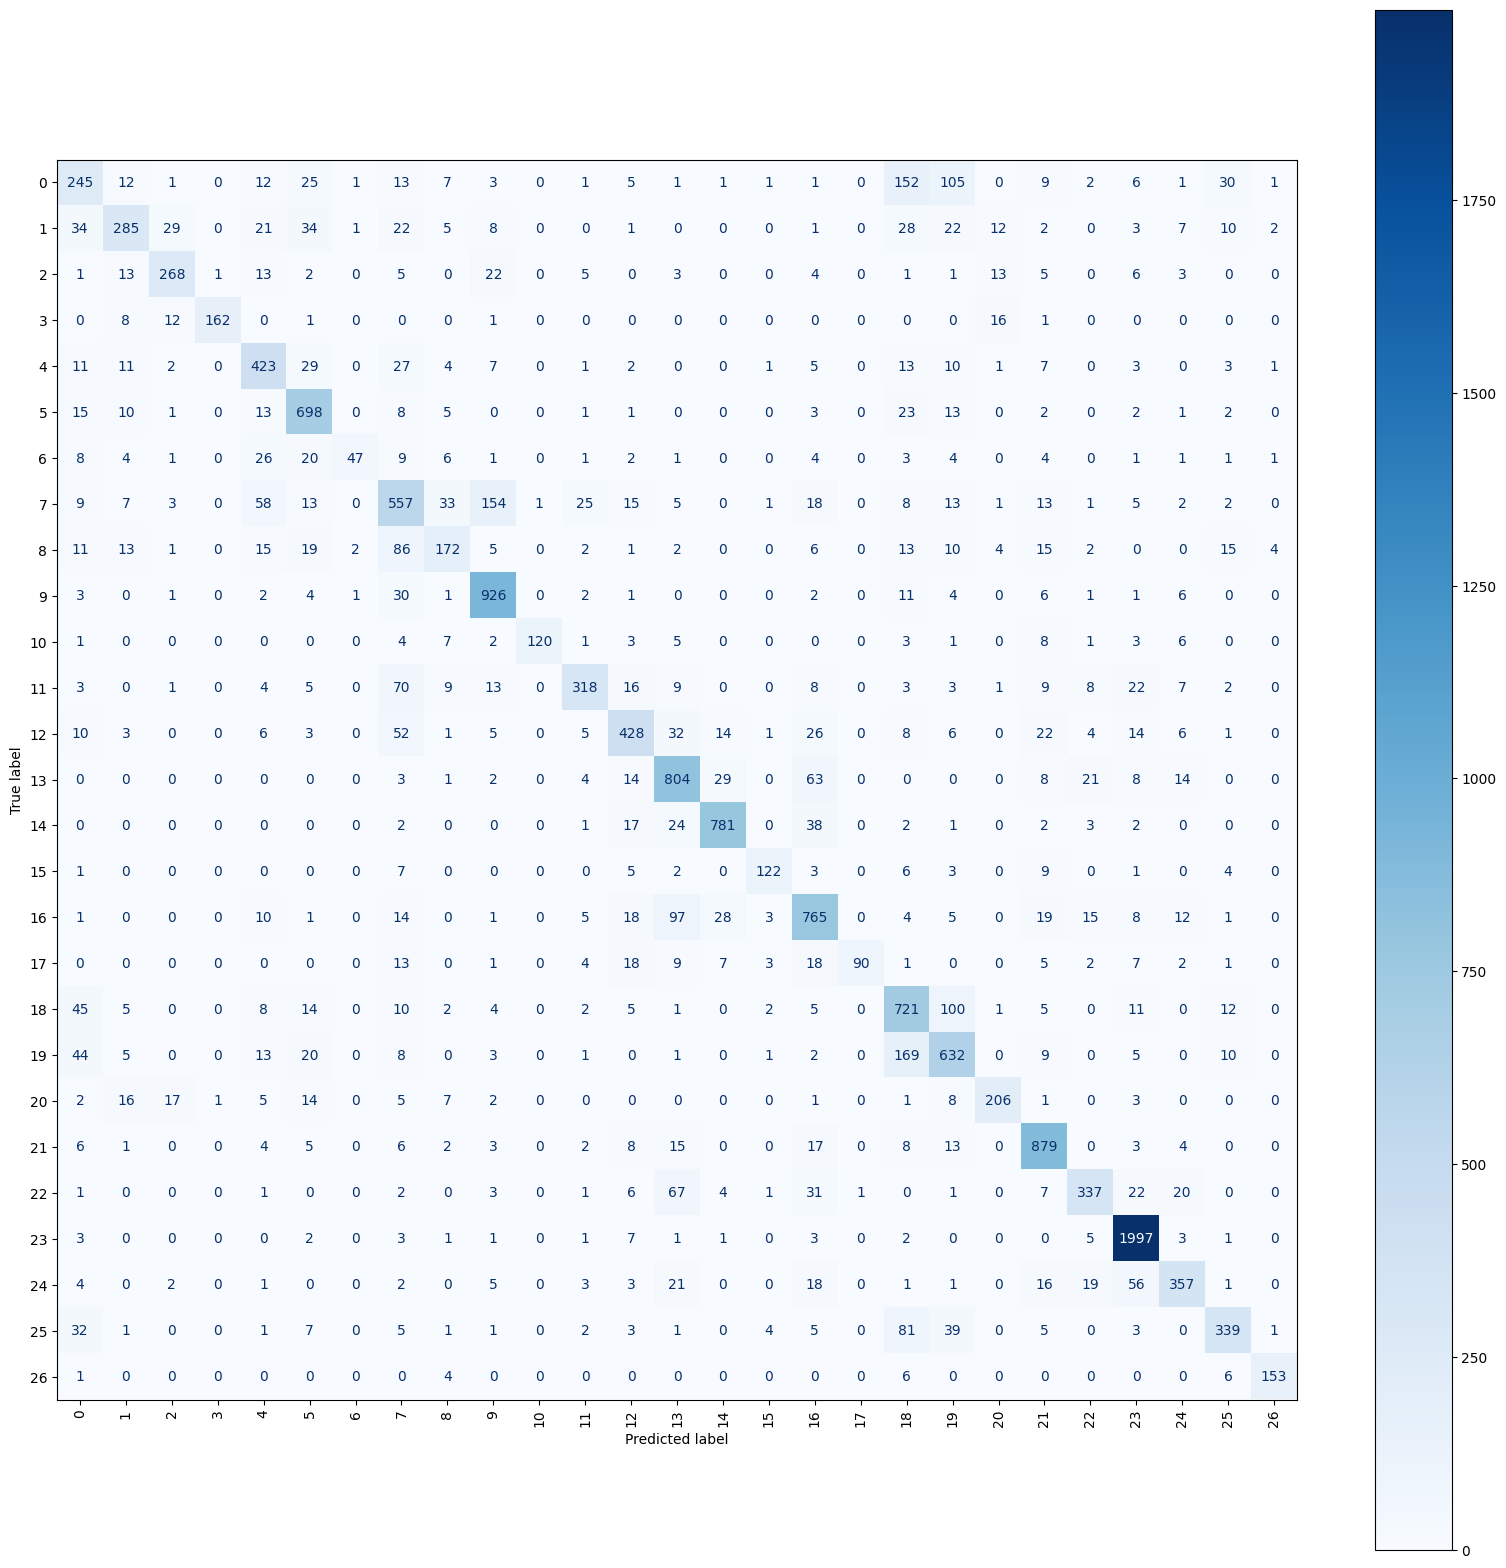

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize =(30,30))
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                     xticks_rotation='vertical', cmap = plt.cm.Blues)
fig = cm_display.ax_.get_figure() 
fig.set_figwidth(20)
fig.set_figheight(20)  

In [64]:
## Calculating the probabilities of products belonging to a particular class
proba_knn = knn.predict_proba(np.asarray(X_vect_avg))

In [69]:
pd.DataFrame(proba_knn).to_csv('proba__text.csv')

### Support vector machine

In [75]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [76]:
# evaluate the model
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test)

Accuracy score is 0.7912029676735559


In [78]:
print("Train Score:", svm.score(X_train, y_train))
print("Test Score:", svm.score(X_test, y_test))

Train Score: 0.8489893859765343
Test Score: 0.7912029676735559


### Dense Neural Networks

In [79]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model

In [80]:
inputs = Input(shape = (100), name = "Input")

dense1 = Dense(units = 200, activation = "tanh", name = "Dense_1")
dense2 = Dense(units = 180, activation = "tanh", name = "Dense_2")
dense3 = Dense(units = 150, activation = "tanh", name = "Dense_3")
dense4 = Dense(units = 130, activation = "tanh", name = "Dense_4")
dense5 = Dense(units = 27, activation = "softmax", name = "Dense_5")

In [81]:
x=dense1(inputs)
x=dense2(x)
x=dense3(x)
x=dense4(x)
outputs=dense5(x)

In [82]:
dnn = Model(inputs = inputs, outputs = outputs)
dnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 100)]             0         
                                                                 
 Dense_1 (Dense)             (None, 200)               20200     
                                                                 
 Dense_2 (Dense)             (None, 180)               36180     
                                                                 
 Dense_3 (Dense)             (None, 150)               27150     
                                                                 
 Dense_4 (Dense)             (None, 130)               19630     
                                                                 
 Dense_5 (Dense)             (None, 27)                3537      
                                                                 
Total params: 106,697
Trainable params: 106,697
Non-trainable

In [83]:
dnn.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [85]:
X_train_array = np.asarray(X_train)

In [104]:
history=dnn.fit(X_train_array, y_train,epochs=20,batch_size=40, validation_split=0.2)

Epoch 1/20
  44/1359 [..............................] - ETA: 3s - loss: 0.1130 - accuracy: 0.9574

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1359/1359 [==============================] - 4s 3ms/step - loss: 0.1355 - accuracy: 0.9507 - val_loss: 0.6594 - val_accuracy: 0.8300
Epoch 2/20
1359/1359 [==============================] - 4s 3ms/step - loss: 0.1270 - accuracy: 0.9544 - val_loss: 0.6916 - val_accuracy: 0.8261
Epoch 3/20
1359/1359 [==============================] - 4s 3ms/step - loss: 0.1225 - accuracy: 0.9557 - val_loss: 0.6892 - val_accuracy: 0.8278
Epoch 4/20
1359/1359 [==============================] - 4s 3ms/step - loss: 0.1266 - accuracy: 0.9539 - val_loss: 0.7007 - val_accuracy: 0.8291
Epoch 5/20
1359/1359 [==============================] - 4s 3ms/step - loss: 0.1271 - accuracy: 0.9541 - val_loss: 0.7042 - val_accuracy: 0.8205
Epoch 6/20
1359/1359 [==============================] - 4s 3ms/step - loss: 0.1195 - accuracy: 0.9569 - val_loss: 0.7091 - val_accuracy: 0.8241
Epoch 7/20
1359/1359 [==============================] - 4s 3ms/step - loss: 0.1235 - accuracy: 0.9553 - val_loss: 0.7161 - val_accuracy: 0.8218
Epo

In [89]:
X_test_array = np.asarray(X_test)

In [91]:
test_pred = dnn.predict(X_test_array)

531/531 [==============================] - 1s 2ms/step


In [93]:
y_pred_class = np.argmax(test_pred,axis=1)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.39      0.44      0.41       648
           1       0.56      0.56      0.56       456
           2       0.68      0.75      0.71       342
           3       0.83      0.85      0.84       157
           4       0.67      0.73      0.70       610
           5       0.83      0.83      0.83       775
           6       0.59      0.41      0.49       164
           7       0.58      0.58      0.58       953
           8       0.49      0.48      0.49       416
           9       0.84      0.83      0.83       981
          10       0.89      0.87      0.88       144
          11       0.72      0.73      0.72       490
          12       0.75      0.74      0.75       664
          13       0.75      0.84      0.79       997
          14       0.86      0.91      0.89       849
          15       0.82      0.85      0.83       166
          16       0.77      0.71      0.74       986
          17       0.76    

<Figure size 3000x3000 with 0 Axes>

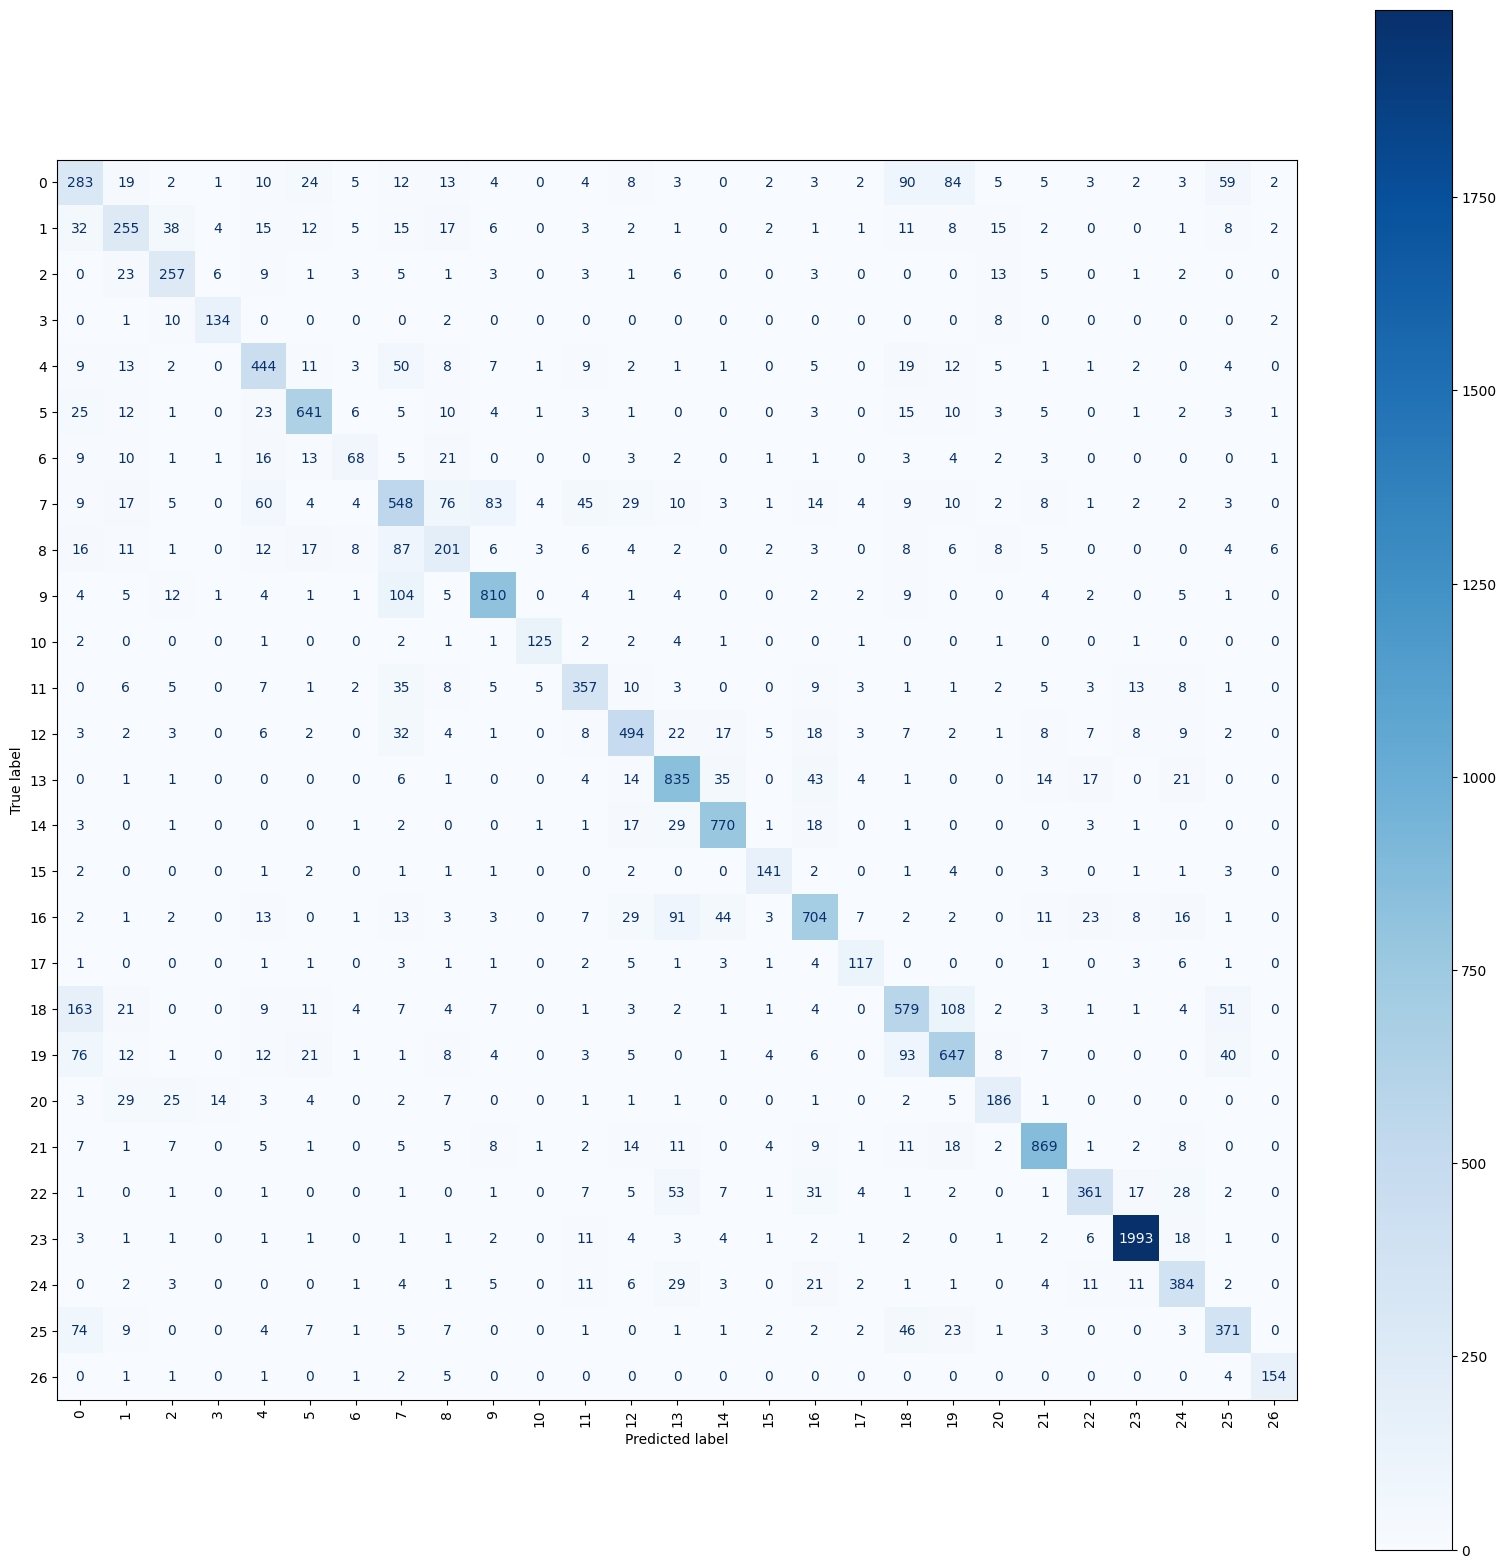

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize =(30,30))
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class, xticks_rotation='vertical', cmap = plt.cm.Blues)
fig = cm_display.ax_.get_figure() 
fig.set_figwidth(20)
fig.set_figheight(20)  

## APPENDIX

### Applying count vectorizer and knn model

In [107]:
df_count= pd.read_csv('df_counter.csv')

In [108]:
## removing rows with missing values
df_count.dropna(inplace = True)

In [109]:
from sklearn.model_selection import train_test_split

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(df_count['processed_text'], 
                                                                                df_count['prdtypecode'], test_size=0.2)

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train_count)
X_test_vec = vectorizer.transform(X_test_count)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_vec, y_train_count)

KNeighborsClassifier(n_neighbors=1)

In [112]:
y_pred_count = knn.predict(X_test_vec)
print("Train Score:", knn.score(X_train_vec, y_train_count))
print("Test Score:", knn.score(X_test_vec, y_test_count))

Train Score: 0.938081498056766
Test Score: 0.6350842068072077


In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test_count, y_pred_count))

              precision    recall  f1-score   support

          10       0.23      0.48      0.31       644
          40       0.43      0.47      0.45       497
          50       0.61      0.54      0.57       315
          60       0.85      0.80      0.82       172
        1140       0.56      0.62      0.59       559
        1160       0.79      0.85      0.82       785
        1180       0.35      0.35      0.35       160
        1280       0.55      0.42      0.47       989
        1281       0.41      0.38      0.39       403
        1300       0.64      0.72      0.68      1003
        1301       0.77      0.76      0.77       140
        1302       0.67      0.54      0.60       502
        1320       0.58      0.55      0.57       665
        1560       0.81      0.63      0.71      1026
        1920       0.85      0.86      0.85       843
        1940       0.63      0.69      0.66       193
        2060       0.71      0.63      0.66       993
        2220       0.34    

<Figure size 3000x3000 with 0 Axes>

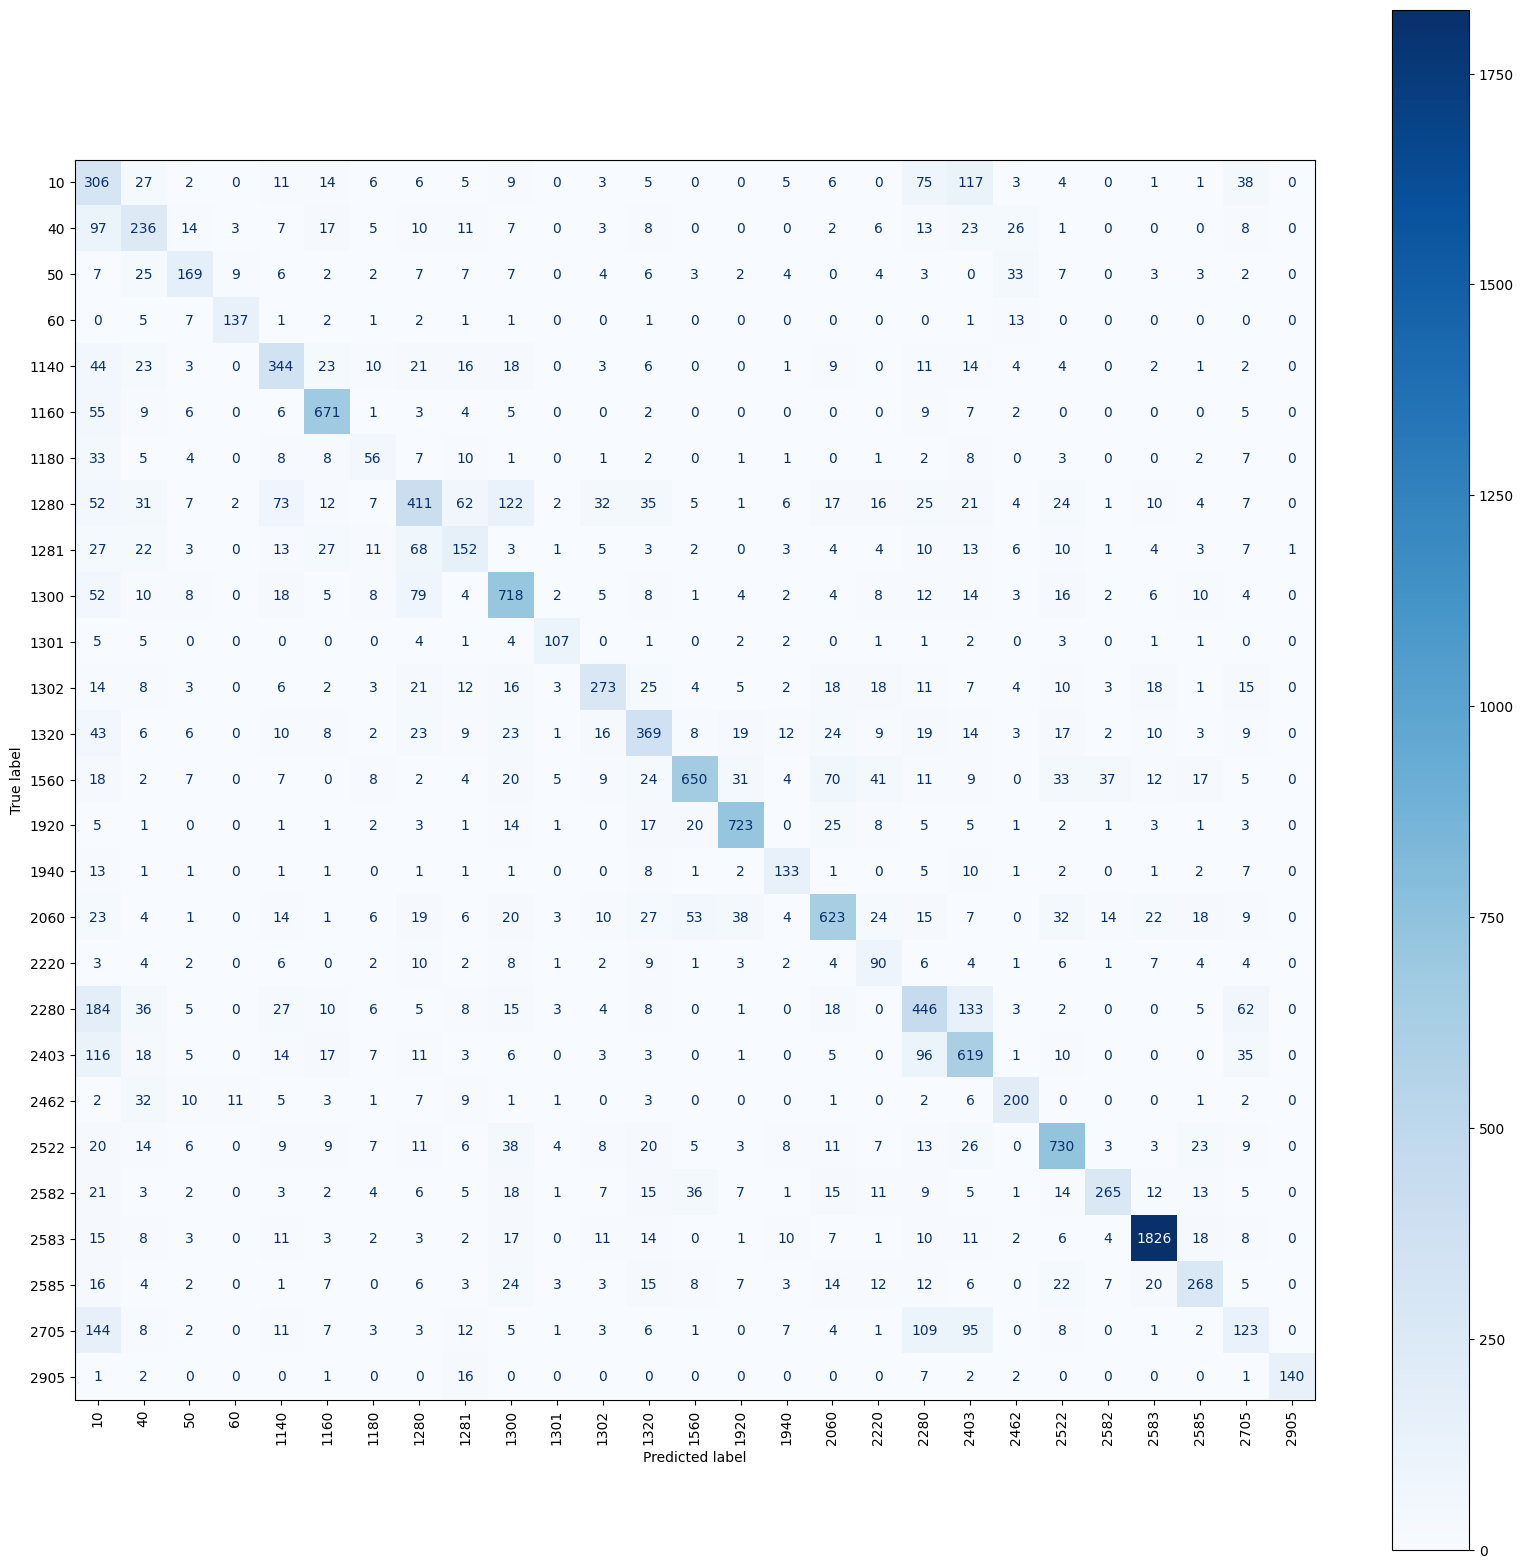

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize =(30,30))
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_count, y_pred_count, 
                                                     xticks_rotation='vertical', cmap = plt.cm.Blues)
fig = cm_display.ax_.get_figure() 
fig.set_figwidth(20)
fig.set_figheight(20)  